In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


In [5]:
import os
import pandas as pd
# Get parent directory to data
pdir = 'C:/Users/tdkev/OneDrive - Johns Hopkins/Deep learning SP21 Project/ds002725-download/'

# Labels directory
# ldir = 'Label_Process/label Data/'
ldir = 'label Data/'

# Save directories
# sdir = 'C:/Users/tdkev/OneDrive - Johns Hopkins/Deep learning SP21 Project/fMRI-labeled/' # Old label directory
sdir = 'C:/Users/tdkev/OneDrive - Johns Hopkins/Deep learning SP21 Project/fMRI-labeled_updated/'
sdir1 = sdir + '1/' # Class 1
sdir2 = sdir + '2/' # Class 2
sdir3 = sdir + '3/' # Class 3
sdir4 = sdir + '4/' # Class 4
# Make save folders
for s in [sdir1,sdir2,sdir3,sdir4]:
    if not os.path.exists(s):
        os.makedirs(s)
        print(s)

pdir_list = []
for p in os.listdir(pdir):
    if 'sub' in p:
        pdir_list.append(p)
print(pdir_list)

count = 0

label_data_df = pd.DataFrame(columns=["img_name","label"])

for p in pdir_list:
    # Get each fmri image from each subject
    dt = pdir+p+'/func/'
    nimg = []
    for ni in os.listdir(dt):
        # sub-01_task-genMusic01_bold.nii.gz is corrupted
        if 'sub-01_task-genMusic01_bold.nii.gz' in ni or 'washout' in ni:
            continue
        elif 'nii.gz' in ni:
            nimg.append(dt+ni)
            
    # Load an image
    for s in nimg:
        sub_img = nib.load(s)
        sub_img_data = sub_img.get_fdata()
        
        count += 1
        num_slices = sub_img.shape[-1]
#         print(sub_img.shape)
        print(count,s.split('/')[-1],num_slices)
#         print(np.min(sub_img_data[:,:,16,0]))
#         print(np.max(sub_img_data[:,:,16,0]))
        
        # Load corresponding label file
        lblfile = ldir+s.split('/')[-1].split('bold')[0]+'eeg.edf.txt'
        lbl = pd.read_csv(lblfile, sep=" ", header=None)
        lbl = zip(lbl[3],lbl[6])
        
        # Convert slices to time scale
        slices_time = np.arange(0,num_slices*2,2)

        for l in lbl:
#             print(l[0]) # l[0] is the time, l[1] is the value
            idx_list = np.argwhere(slices_time>=l[0]).tolist() # Get index that matches with time
            if idx_list:
                idx = idx_list[0][0]
            else:
                idx = num_slices-1
#             print(idx)
            # Where to save slice
            class_img_name = 'slice_'+str(idx)+'_'+s.split('/')[-1]
            save_name = sdir + str(int(l[1])) + '/' + class_img_name
            if os.path.isfile(sdir1+class_img_name) or os.path.isfile(sdir2+class_img_name) or os.path.isfile(sdir3+class_img_name) or os.path.isfile(sdir4+class_img_name):
#                 print(save_name,'already saved')
                continue
            else:
#                 print('Saving:',save_name)
                slice_img_np = sub_img_data[:,:,:,idx]
#                 print(slice_img_np.shape)
                img_affine = sub_img.affine
                nft_img = nib.Nifti1Image(slice_img_np, img_affine)
                nib.save(nft_img,save_name)
                label_data_df = label_data_df.append({'img_name':class_img_name,'label':int(l[1])},ignore_index=True)
#             break    
            
#         plt.figure()
#         plt.imshow(sub_img_data[:,:,16,0])
#         plt.colorbar()
#         plt.set_cmap('gray')
#         plt.plot()
#         break
#     break
label_data_df.to_csv(sdir+'class_label_image.csv',index=False,header=True)
# Classical music played for different durations:
    # Rachmanioff's prelude - 127 (s)
    # Chopin's etude - 150 (s)
    # Mendelssohn's Variations sérieuses - 170 (s)
    # Beethoven's sonata - 158(s)
# Totals 605 (s) * 3 trial_types = ~1815 seconds + ~60 (fixation cross)
    # With MRI at 2 second TR -> Should provide around ~937 images
    # but, there are additional delays which increases the number

# Generated music played at 40 second intervals
    # 3 runs of 10 minutes each, 12 trials
    # 40 (s) * 12 trials = 540 seconds - > ~270 MRI images

['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16', 'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21']
1 sub-01_task-classicalMusic_bold.nii.gz 930
2 sub-01_task-genMusic02_bold.nii.gz 289
3 sub-01_task-genMusic03_bold.nii.gz 277
4 sub-02_task-classicalMusic_bold.nii.gz 934
5 sub-02_task-genMusic01_bold.nii.gz 274
6 sub-02_task-genMusic02_bold.nii.gz 276
7 sub-02_task-genMusic03_bold.nii.gz 274
8 sub-03_task-classicalMusic_bold.nii.gz 933
9 sub-03_task-genMusic01_bold.nii.gz 281
10 sub-03_task-genMusic02_bold.nii.gz 276
11 sub-03_task-genMusic03_bold.nii.gz 279
12 sub-04_task-classicalMusic_bold.nii.gz 934
13 sub-04_task-genMusic01_bold.nii.gz 276
14 sub-04_task-genMusic02_bold.nii.gz 278
15 sub-04_task-genMusic03_bold.nii.gz 279
16 sub-05_task-classicalMusic_bold.nii.gz 934
17 sub-05_task-genMusic01_bold.nii.gz 278
18 sub-05_task-genMusic02_bold.nii.gz 276
19 sub-05_task-genMusi

In [8]:
label_data_df = pd.DataFrame(columns=["img_name","label"])
count = 0
for s in [sdir1,sdir2,sdir3,sdir4]:
    listdir = os.listdir(s)
    for class_img_name in listdir:
        label_data_df = label_data_df.append({'img_name':class_img_name,'label':int(s[-2])},ignore_index=True)
        count += 1
print('total images:',count)
label_data_df.to_csv(sdir+'class_label_image.csv',index=False,header=True)

total images: 11107


In [56]:
np.argwhere(slices_time>=l[0])

array([], shape=(0, 1), dtype=int64)

(64, 64, 37)


[]

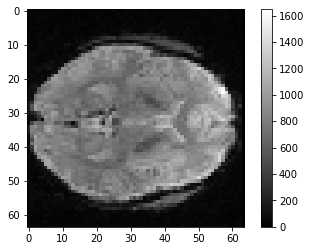

In [5]:
s = 'C:/Users/tdkev/OneDrive - Johns Hopkins/Deep learning SP21 Project/fMRI-labeled/4/slice_182_sub-01_task-classicalMusic_bold.nii.gz'
s = 'C:/Users/tdkev/OneDrive - Johns Hopkins/Deep learning SP21 Project/fMRI-labeled_updated/3/slice_7_sub-21_task-genMusic03_bold.nii.gz'
sub_img = nib.load(s)
sub_img_data = sub_img.get_fdata()
print(sub_img.shape)
plt.figure()
plt.imshow(sub_img_data[:,:,16])
plt.colorbar()
plt.set_cmap('gray')
plt.plot()